<a href="https://colab.research.google.com/github/DaDosValle/Analise_Preditiva-Machine_Learning-TelecomX/blob/main/Analise_Preditiva_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Modelos de classificação de churn (evasão) clientes Telecom X**

#### Quem são os clientes com maior risco de evasão?
#### Quais variáveis mais influenciam esse comportameto?
#### Que tipo de perfil a empresa precisa manter mais próximo?

### - Prepararando os dados para a modelagem e analisando correlação.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    7043 non-null   int64  
 1   sexo                     7043 non-null   object 
 2   idoso                    7043 non-null   int64  
 3   possui parceiro          7043 non-null   int64  
 4   possui dependentes       7043 non-null   int64  
 5   tempo contrato           7043 non-null   int64  
 6   servico telefone         7043 non-null   int64  
 7   multiplas linhas         7043 non-null   int64  
 8   servico internet         7043 non-null   object 
 9   suporte tecnico          7043 non-null   int64  
 10  streaming tv             7043 non-null   int64  
 11  streaming filmes         7043 non-null   int64  
 12  contrato conta           7043 non-null   object 
 13  preco diario             7043 non-null   float64
 14  cobrancas mensais       

In [7]:
dados.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade,churn_label
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7,Permaneceram
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5,Permaneceram
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0,Saíram
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8,Saíram
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5,Saíram


In [8]:
dados['servico internet'].value_counts()

,count
servico internet,
Fibra optica,3096
DSL,2421
Nao disponivel,1526


In [10]:
dados['contrato conta'].value_counts()

,count
contrato conta,
Mensal,3875
Dois anos,1695
Um ano,1473


In [11]:
dados.describe().round(2)

,churn,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte tecnico,streaming tv,streaming filmes,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,0.48,0.30,32.37,0.9,0.42,0.29,0.38,0.39,2.16,64.76,2284.33,2219.56
std,0.44,0.37,0.50,0.46,24.56,0.3,0.49,0.45,0.49,0.49,1.00,30.09,2265.95,2246.51
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.60,18.20,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,1.20,35.50,401.90,355.75
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,2.30,70.40,1398.60,1352.20
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,3.00,89.80,3801.50,3730.10
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,4.00,118.80,8684.80,8567.00


In [12]:
dados.describe(include='O')

,sexo,servico internet,contrato conta,churn_label
count,7043,7043,7043,7043
unique,2,3,3,2
top,Masculino,Fibra optica,Mensal,Permaneceram
freq,3555,3096,3875,5174


In [13]:
df = dados.copy()

df = pd.get_dummies(df, columns=['sexo',
    'servico internet',
    'contrato conta'
], drop_first=True)

In [16]:
df = df.drop(['churn_label'], axis=1)
df

,churn,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte tecnico,streaming tv,streaming filmes,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade,sexo_Masculino,servico internet_Fibra optica,servico internet_Nao disponivel,contrato conta_Mensal,contrato conta_Um ano
0,0,0,1,1,9,1,0,1,1,0,2.2,65.6,593.3,527.7,False,False,False,False,True
1,0,0,0,0,9,1,1,0,0,1,2.0,59.9,542.4,482.5,True,False,False,True,False
2,1,0,0,0,4,1,0,0,0,0,2.5,73.9,280.8,207.0,True,True,False,True,False
3,1,1,1,0,13,1,0,0,1,1,3.3,98.0,1237.8,1139.8,True,True,False,True,False
4,1,1,1,0,3,1,0,1,1,0,2.8,83.9,267.4,183.5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,0,0,1.8,55.2,742.9,687.8,False,False,False,False,True
7039,1,0,1,0,22,1,1,0,0,1,2.8,85.1,1873.7,1788.6,True,True,False,True,False
7040,0,0,0,0,2,1,0,0,0,0,1.7,50.3,92.8,42.4,True,False,False,True,False
7041,0,0,1,1,67,1,0,1,0,1,2.3,67.8,4627.6,4559.8,True,False,False,False,False


In [19]:
df.corr().round(2)

,churn,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte tecnico,streaming tv,streaming filmes,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade,sexo_Masculino,servico internet_Fibra optica,servico internet_Nao disponivel,contrato conta_Mensal,contrato conta_Um ano
churn,1.00,0.15,-0.15,-0.16,-0.35,0.01,0.04,-0.16,0.06,0.06,0.19,0.19,-0.20,-0.20,-0.01,0.31,-0.23,0.41,-0.18
idoso,0.15,1.00,0.02,-0.21,0.02,0.01,0.14,-0.06,0.11,0.12,0.22,0.22,0.10,0.10,-0.00,0.26,-0.18,0.14,-0.05
possui parceiro,-0.15,0.02,1.00,0.45,0.38,0.02,0.14,0.12,0.12,0.12,0.10,0.10,0.32,0.32,-0.00,0.00,0.00,-0.28,0.08
possui dependentes,-0.16,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.06,-0.02,-0.04,-0.11,-0.11,0.07,0.07,0.01,-0.17,0.14,-0.23,0.07
tempo contrato,-0.35,0.02,0.38,0.16,1.00,0.01,0.33,0.32,0.28,0.29,0.25,0.25,0.82,0.83,0.01,0.02,-0.04,-0.65,0.20
servico telefone,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.10,-0.02,-0.03,0.25,0.25,0.11,0.11,-0.01,0.29,0.17,-0.00,-0.00
multiplas linhas,0.04,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.26,0.26,0.49,0.49,0.47,0.47,-0.01,0.37,-0.21,-0.09,-0.00
suporte tecnico,-0.16,-0.06,0.12,0.06,0.32,-0.10,0.10,1.00,0.28,0.28,0.34,0.34,0.43,0.43,-0.01,-0.02,-0.34,-0.29,0.10
streaming tv,0.06,0.11,0.12,-0.02,0.28,-0.02,0.26,0.28,1.00,0.53,0.63,0.63,0.52,0.51,-0.01,0.33,-0.42,-0.11,0.06
streaming filmes,0.06,0.12,0.12,-0.04,0.29,-0.03,0.26,0.28,0.53,1.00,0.63,0.63,0.52,0.52,-0.01,0.32,-0.42,-0.12,0.06


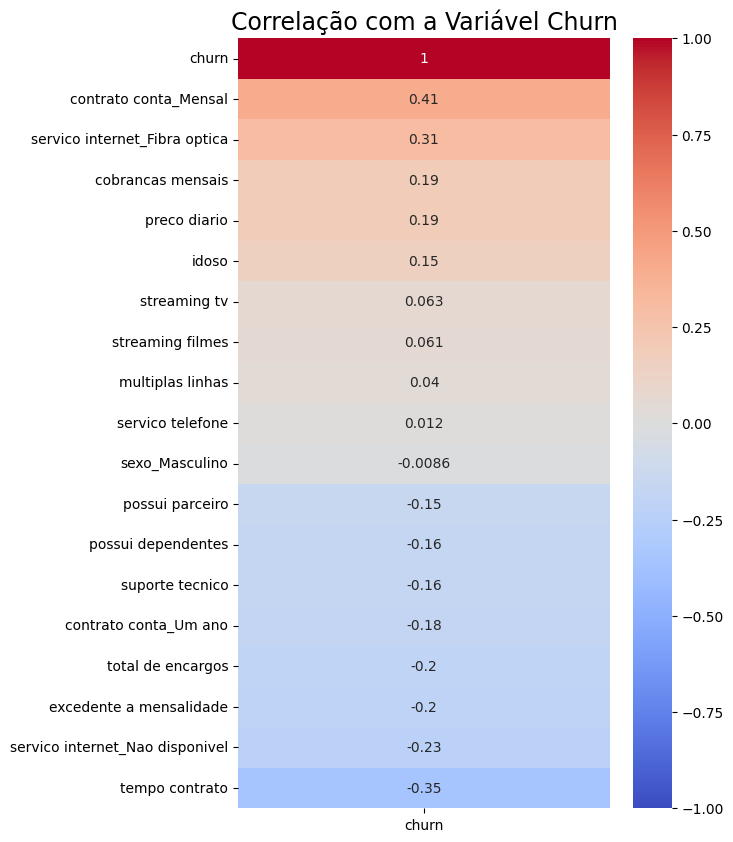

In [18]:
plt.figure(figsize=(6, 10))

# Correlação das variáveis explicativas com a variavel churn
corr_churn = df.corr(numeric_only=True)[['churn']].sort_values(by='churn', ascending=False)

sns.heatmap(corr_churn, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlação com a Variável Churn', fontsize=17)
plt.show()


In [20]:
# Tratando para evitar multicolirade
df[['tempo contrato','total de encargos','cobrancas mensais']].corr()

,tempo contrato,total de encargos,cobrancas mensais
tempo contrato,1.000000,0.823814,0.247890
total de encargos,0.823814,1.000000,0.650018
cobrancas mensais,0.247890,0.650018,1.000000


In [21]:
# Seleção da variável resposta/alvo
y = df['churn']

# Seleção das variáveis explicativas
X = df.drop(['churn', 'cobrancas mensais'], axis=1)

In [22]:
X

,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte tecnico,streaming tv,streaming filmes,preco diario,total de encargos,excedente a mensalidade,sexo_Masculino,servico internet_Fibra optica,servico internet_Nao disponivel,contrato conta_Mensal,contrato conta_Um ano
0,0,1,1,9,1,0,1,1,0,2.2,593.3,527.7,False,False,False,False,True
1,0,0,0,9,1,1,0,0,1,2.0,542.4,482.5,True,False,False,True,False
2,0,0,0,4,1,0,0,0,0,2.5,280.8,207.0,True,True,False,True,False
3,1,1,0,13,1,0,0,1,1,3.3,1237.8,1139.8,True,True,False,True,False
4,1,1,0,3,1,0,1,1,0,2.8,267.4,183.5,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,13,1,0,1,0,0,1.8,742.9,687.8,False,False,False,False,True
7039,0,1,0,22,1,1,0,0,1,2.8,1873.7,1788.6,True,True,False,True,False
7040,0,0,0,2,1,0,0,0,0,1.7,92.8,42.4,True,False,False,True,False
7041,0,1,1,67,1,0,1,0,1,2.3,4627.6,4559.8,True,False,False,False,False


### -  Treinando modelos de classificação.


In [23]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
y.value_counts(normalize=True).round(2)

,proportion
churn,
0,0.73
1,0.27


- Avaliar o desempenho dos modelos com métricas.

- Interpretar os resultados, incluindo a importância das variáveis.

- Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.